<a href="https://colab.research.google.com/github/AlbusDracoSam/Farmers-protest-tweet-analysis/blob/main/Farmer's_protest_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Farmer's protest tweet analysis**

In [128]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

In [40]:
url = "https://raw.githubusercontent.com/AlbusDracoSam/Farmer-s-protest-tweet-analysis/main/tweetsfarmbills.csv"
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,Date,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
0,0,2021-01-01 23:48:40,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when you stop listening and just want proof th...,NEGATIVE
1,1,2021-01-01 21:16:19,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,speech farmers protest must watch and share,POSITIVE


**Getting data using the index**

In [41]:
string = df._get_value(2, 'Clean Tweet')
string

'half the problem got sorted when left the remaining will get sorted when yogendra yadav leaves the not the problem they amp are'

**Sample analysis of a single tweet**

In [42]:
#create a textblob object
obj = TextBlob(string)

#sentiment is an index which return a value between -1 and 1.
sentiment = obj.sentiment.polarity

#Prints the value
print(sentiment)

-0.08333333333333333


The understanding of the output is essential. It will return the values from -1 to 1.

If the value returned is in the range -1 to 0 then it's a cobmination of both the negative and neutral.

If the value returned is in the range of 0 to 1 then it's a hybrid of both the positive and neutral.

If the value returned is 0. Then it's absolutely Neutral

In [43]:
#Analysis of First 10 tweets
for i in range(10):
    string = df._get_value(i, 'Clean Tweet')
    obj = TextBlob(string)
    sentiment = obj.sentiment.polarity
    print('{2}. {0} *** {1}'.format(string,sentiment,i))

0. when you stop listening and just want proof that only you are right behaving like communist let behave like democratic nation *** 0.14285714285714285
1. speech farmers protest must watch and share *** 0.0
2. half the problem got sorted when left the remaining will get sorted when yogendra yadav leaves the not the problem they amp are *** -0.08333333333333333
3. could have been drafted much bettercoming from academicians they should have focused solely merits the bills and not vouch for govts intent promises being made outside bill draft still good see people coming out support *** 0.3
4. the french revolution was turningpoint the rise democracy and freedom not just france but across europe and the wider world *** 0.0
5. years power has finally found his match *** 0.0
6. with farmers *** 0.0
7. seems good year for farmers better start moving *** 0.6
8. farmers are dying you would die due hunger simple that *** -0.0625
9. press conference kisan andolan representatives tomorrow the gov

**Counting Positive, Negative and Neutral tweets**

In [44]:
#Counting number of positive,negative and neutral opinions.
positive = 0
negative = 0
neutral = 0
for i in range(len(df)):
    string = df._get_value(i, 'Clean Tweet')
    obj = TextBlob(string)
    sentiment = obj.sentiment.polarity
    if(sentiment > 0):
        positive += 1
    if(sentiment < 0):
        negative += 1
    if(sentiment == 0):
        neutral += 1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))
print("The number of neutral views are : " + str(neutral))

The number of positive views are : 1391
The number of negative views are : 704
The number of neutral views are : 1654


**Pie-Chart**

<function matplotlib.pyplot.show>

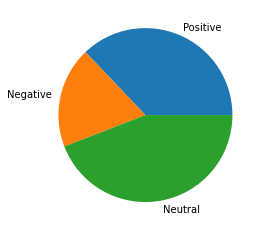

In [45]:
slices = [positive, negative, neutral]
names = ["Positive", "Negative", "Neutral"]
plt.pie(slices, labels=names)
plt.show

**Tweets by places**

In [47]:
Places = []
Dictionary = {}
for i in range(len(df)):
    string = df._get_value(i, 'Location')
    if string not in Places:
        Places.append(string)
for place in Places:
    count = 0
    for i in range(3749):
        string = df._get_value(i,'Location')
        if(string == place):
            count += 1
    Dictionary.update({place : count})
for key in Dictionary:
    if(Dictionary[key]>=25):
        print(key + " : " + str(Dictionary[key]))

India : 327
New Delhi, India : 145
Bengaluru, India : 27
Mumbai : 33
Chandigarh, India : 44
New Delhi : 38
Mumbai, India : 50
Hyderabad, India : 36
Brampton, Ontario : 26
Punjab, India : 34


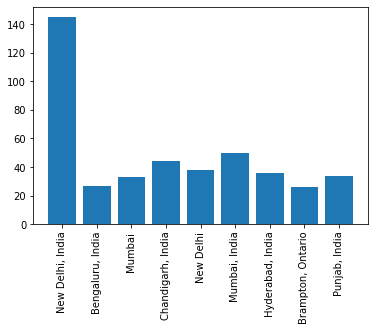

In [48]:
keys = []
values = []
for key in Dictionary:
    if(Dictionary[key]>=25 and Dictionary[key]<200):
        keys.append(key)
        values.append(Dictionary[key])
plt.bar(keys,values,)
plt.xticks(rotation='vertical')
plt.show()

**New Delhi Tweets**

In [54]:
df.loc[df['Location'] == 'New Delhi, India']

,Unnamed: 0,Date,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
2,2,2021-01-01 20:10:18,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half the problem got sorted when left the rema...,NEGATIVE
9,9,2021-01-01 18:10:24,Press conference by Kisan Andolan representati...,Twitter for iPhone,0,0,"New Delhi, India",press conference kisan andolan representatives...,POSITIVE
16,16,2021-01-01 16:41:18,@narendramodi @PMOIndia @nstomar \nThis is all...,Twitter Web App,0,1,"New Delhi, India",this all you people and never forget that hist...,NEGATIVE
55,55,2021-01-01 04:46:15,Watch here farmers protests full documentary\n...,Twitter for Android,0,0,"New Delhi, India",watch here farmers protests full documentary c...,NEGATIVE
57,57,2021-01-01 03:51:31,@mastersheefu_\n\nGood Morning\n🙏🙏🙏\n\nTo supp...,Twitter for Android,1,2,"New Delhi, India",good morning support farmers posting this picture,POSITIVE
...,...,...,...,...,...,...,...,...,...
3359,3359,2020-12-18 09:26:49,"""New Agri laws haven't come overnight...""\n\nR...",Twitter Web App,1,1,"New Delhi, India",new agri laws havent come overnight read what ...,NEGATIVE
3364,3364,2020-12-18 09:18:22,The Farmers Acts – A Bird’s Eye View. Written ...,Twitter for Advertisers (legacy),0,3,"New Delhi, India",the farmers acts birds eye view written adv ma...,POSITIVE
3556,3556,2020-12-18 01:30:00,"At this stage, farmers’ protest should be allo...",TweetDeck,0,0,"New Delhi, India",this stage farmers protest should allowed says,NEGATIVE
3572,3572,2020-12-17 23:41:46,People who have never done agriculture or not ...,Twitter for Android,0,0,"New Delhi, India",people who have never done agriculture not eve...,POSITIVE


In [55]:
positive = 0
negative = 0
neutral = 0
for i in range(3749):
    string = df._get_value(i, 'Clean Tweet')
    stringone = df._get_value(i, 'Location')
    if(stringone == 'New Delhi, India'):
        obj = TextBlob(string)
        senti = obj.sentiment.polarity
        if(senti > 0):
            positive += 1
        if(senti < 0):
            negative += 1
        if(senti == 0):
            neutral += 1
print("The number of positive views are : " + str(positive))
print("The number of negative views are : " + str(negative))
print("The number of neutral views are : " + str(neutral))

The number of positive views are : 61
The number of negative views are : 37
The number of neutral views are : 47


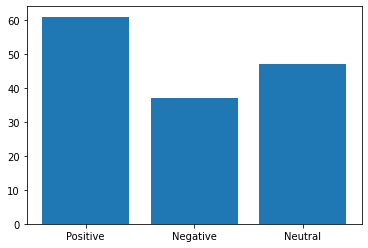

In [56]:
#Representaion of views in a pie chart
slices = [positive, negative, neutral]
Names = ['Positive', 'Negative', 'Neutral']
plt.bar(Names, slices)
plt.show()

**Classification by date**

Selecting the tweets between the date from 26th Dec 2020 to 1st Jan 2021

In [120]:
pos_tweets = []
neg_tweets = []
def date_filtered(date):
    positive = 0
    negative = 0
    for i in range(3749):
        string = df._get_value(i, 'Date')
        stringone = df._get_value(i, 'Clean Tweet')
        if(date in string):
            obj = TextBlob(stringone)
            sentiment = obj.sentiment.polarity
            if(sentiment > 0):
                positive += 1
            if(sentiment < 0):
                negative +=1
    pos_tweets.append(positive)
    neg_tweets.append(negative)

In [121]:
date_filtered('2020-12-26')
date_filtered('2020-12-27')
date_filtered('2020-12-28')
date_filtered('2020-12-29')
date_filtered('2020-12-30')
date_filtered('2020-12-31')
date_filtered('2021-01-01')
print(pos_tweets)
print(neg_tweets)

[99, 62, 53, 80, 112, 50, 26]
[47, 36, 30, 43, 46, 22, 8]


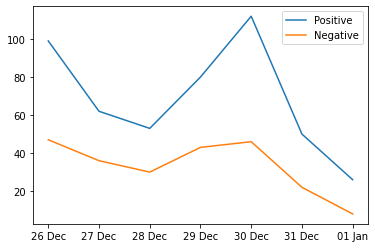

In [126]:
Dates = ['26 Dec','27 Dec','28 Dec','29 Dec','30 Dec','31 Dec','01 Jan']
plt.plot(Dates,pos_tweets,label='Positive')
plt.plot(Dates,neg_tweets,label='Negative')
leg = plt.legend();
plt.show()

In [139]:
maxRT = df['Retweets'].max()
maxLikes = df['Likes'].max()
fav=df[df.Likes==maxLikes].index[0]
rt=df[df.Retweets==maxRT].index[0]


print(f"The most liked tweet is: {df['Clean Tweet'][fav]}")
print(f"Number of likes: {maxLikes}")
print("------------------")
print()

#Print the most retweeted tweet
print(f"The most Retweeted tweet is: {df['Clean Tweet'][rt]}")
print(f"Number of Retweets: {maxRT}")
print("------------------")
print()


The most liked tweet is: its high time opp political parties stop playing with for their personal gain was against the farmers there would have been protests all over you see the problem only the north our are not for you play dirty games with
Number of likes: 1687
------------------

The most Retweeted tweet is: the indian has seen show global solidarity with calls supporting the supreme court judgment the right citizens peacefully protest and for the bills put hold until resolution can reached
Number of Retweets: 294
------------------

